<h1>점진적인 학습</h1>
<hr>

<h4> 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련 방식. </h4>

<h4> 이렇게 하면 훈련에 사용한 데이터를 모두 유지할 필요도 없고 앞서 학습한 내용도 까먹을 일이 없음. </h4>

<h1>확률적 경사 하강법</h1>
<hr>
<h4>경사 하강법: 가장 가파른 경사를 따라 원하는 지점에 도달한다.</h4>
<h4>경사 하강법 모델을 훈련한다 = 가장 가파른 길을 찾아 내려오지만 조금씩 내려온다.</h4>
<h4>훈련 세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 훈련 세트를 사용하여 가장 가파른 길을 찾을 것이다.</h4>
<h4>확률적 경사 하강법: 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다.<br>
    즉, 훈련세트에서 랜덤하게 하나의 샘플을 고르는 것이 확률적 경사 하강법이다.</h4>
    
<h3>즉, 확률적 경사 하강법이란 <br>
    훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려갑니다. <br>
    그다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. <br>
    이런 식으로 전체 샘플을 모두 사용할 때까지 계속한다.
</h3>


## 간단하게 말하자면, 훈련 세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘

<h1>에포크</h1>
<hr>
<h3> 
    만약, 확률적 경사 하강법으로 모든 샘플을 다 사용했는데 산을 다 내려오지 못하면 어떻게 할까? <br>
    <h2>다시 처음부터 시작하면 된다! <br>
        훈련 세트에 모든 샘플들을 다시 채워 넣는다. <br>
        그리고 다시 확률적 경사 하강을 한다.</h2>
</h3>

<h2> 이처럼, 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 <mark>에포크</mark>라 부른다.</h2>

# 미니배치 경사 하강법
<hr>

### 확률적 경사 하강법에서 1개씩 샘플을 선택하는 것이 아니라 무작위로 몇 개의 샘플을 선택해서 경사를 따라 내려가는 방식

# 배치 경사 하강법
<hr>

### 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용

# 손실함수
<hr>

### 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 특정하는 기준이다.

### 손실 함수의 값이 작을수록 좋다.

<p style="font-size: 20px;">
    하지만, 어떤 값이 최솟값인지는 알지 못한다. 가능한 많이 찾아보고 만족할 수준이면 산을 다 내려왔다고 인정해야 된다.
</p>

<p style="font-size: 20px">
분류애서 손실은 정답을 맞히는 못 하는 거다. <br>
정확도로 손실함수로 가능하나 치명적인 단점이 있다. <br>
샘플이 적을 수록 정확도는 듬성듬성 하기에 경하 하강법이 추구하는 "조금씩 내려온다."를 실현할 수 없다. <br>
이를 기술적으로 표현하면
   
</p>
<h1> 손실함수는 미분이 가능해야 된다.</h1>

<p style="font-size: 20px;">
    연속적인 손실 함수는 어떻게 만들까? <br>
    예측은 0 또는 1이지만 확률은 0~1 사이의 어떤 값도 될 수 있다. 즉, 연속적이다. <br>
    이것은 로지스틱 함수이다.
</p>

<h1>로지스틱 손실 함수</h1>
<hr>    
    
이진 분류에서는 로지스틱 손실 함수를 사용하고

다중 분류에서는 크로스엔트로피 손실 함수를 사용한다.
    
    
    
    
    
    
    

In [60]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [62]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.8


/Users/bangchan-u/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [64]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7899159663865546
0.825


In [68]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8487394957983193
0.9


In [70]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8571428571428571
0.9


In [72]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8487394957983193
0.9


훈련한 모델 sc를 추가로 훈련함에 따라 정확도가 향상되었다. <br>
partial_fit 메서드는 fit 메서드와 사용법이 같지만 1 에포크씩 이어서 훈련할 수 있다. <br>


SGDClassifier 객체에 한 번에 훈련 세트 전체를 전달했지만 이 알고리즘은 전달한 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행한다.

<h1>에포크와 과대/과소 적합</h1>
<hr>

### 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.

### 적은 에포크 횟수 동안에 훈련한 모델은 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 높다

### 많은 에포크 횟수 동안에 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 점수가 나쁜 과대적합된 모델일 가능성이 높다.

<h1>최적의 에포크 찾기</h1>
<hr>

<img src="https://velog.velcdn.com/images/jeanny/post/29d2948d-28cf-48f6-81aa-c4e5cbf032bb/image.png"
     width="400px"
     height="400px"
     />


### 최적의 에포크 수를 찾아 보자.
### 이 그래프에는 에포크가 진행됨에 따라 모델의 정확도를 나타낸 것이다.
### 훈련 세트 점수는 에포크가 진행됨에 따라 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 부터 감소하기 시작하자
### 바로 그 지점에서 과대적합이 시작된다
### 과대적합이 시작하기 전에 훈련을 멈추는 것을 조기 종료라고 한다.
### 그리고 이 조기 종료 시점이 훈련 세트와 테스트 세트 점수가 가장 높으면서 차이도 적당한 지점이다.

# 즉, 조기 종료 지점 = 최고의 에포트 횟수

In [98]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)
#partial_fit만을 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit 메서드에 전달해주어여 한다.
#이를 위해 np.unique()함수로 train_target에 있는 7개의 생성 목록을 만든다.
print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [101]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))


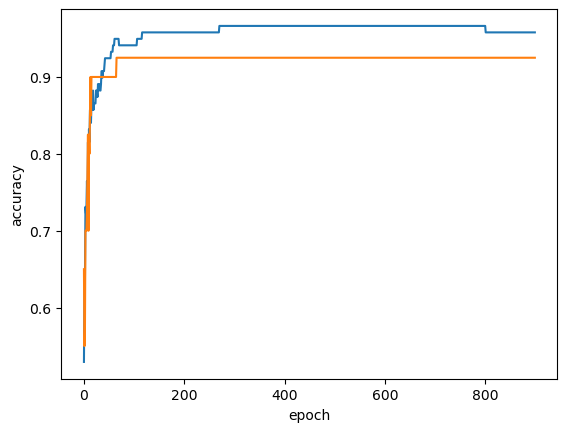

In [110]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 대략적으로 100 쯤에서 훈련 셋, 테스트 셋 점수도 높고 점수도 차이도 적당하다
## 100이 최적의 에포크 횟수이다.

In [111]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


### SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.
### tol 매개변수에서 향상될 최솟값을 지정합니다. 앞의 코드에서는 tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고
### max_iter=100 만큰 무조건 반복으로 하였다.

In [112]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


### 끝으로 SGDClassifier의 default 손실 함수는 힌지 손실이다. 이 힌지 손실은 서포트 벡터 머신이라고 불리기도 한다.

In [7]:
import numpy as np
print(-1 * np.log10(0.9))
print(-1 * np.log10(0.3))
print(-1 * np.log10(1 - 0.2))
print(-1 * np.log10(1 - 0.8))

0.045757490560675115
0.5228787452803376
0.09691001300805639
0.6989700043360189
